In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
plt.rc('font', family='serif')
plt.rc('font', size=18)

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
data['data'].shape

(506, 13)

In [6]:
data['target'].shape

(506,)

In [7]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
dataframe = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [9]:
dataframe['price'] = pd.Series(data=data['target'], name='price')
dataframe.drop(['B'], axis=1, inplace=True)
#dataframe.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'B', 'LSTAT'], axis=1, inplace=True)

In [10]:
naming_convention = {'CRIM':'crime', 'RM':'rooms','AGE':'age','DIS':'distance','TAX':'tax', 'PTRATIO':'median_value'}
dataframe.rename(index=str, columns=naming_convention, inplace=True)

In [11]:
dataframe.head(12)

,crime,ZN,INDUS,CHAS,NOX,rooms,age,distance,RAD,tax,median_value,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [12]:
features = list(dataframe.columns)
features.remove('price')

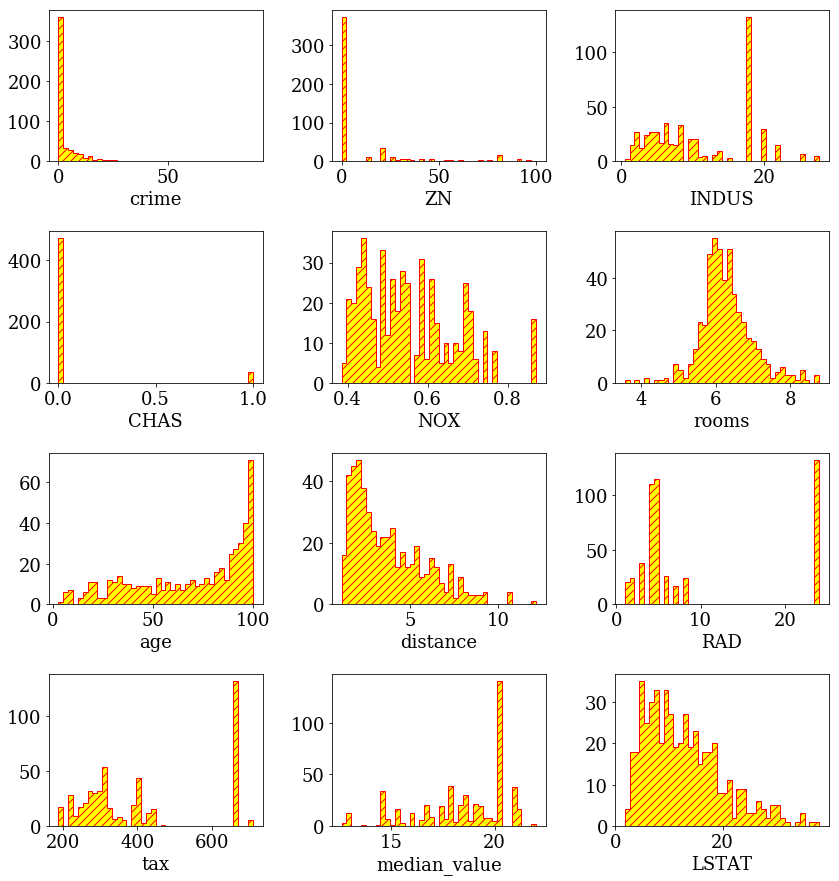

In [13]:
n_col = 3
n_row = 1 + np.ceil(len(features)/n_col)
plt.figure(figsize=(4*n_col,3*n_row))

for index, feature in enumerate(features):
    plt.subplot(n_row, n_col, index+1)
    plt.hist(dataframe[feature], bins=40, histtype='stepfilled', 
             edgecolor='red', color='yellow', hatch='///');
    plt.xlabel(feature)
    
plt.tight_layout()

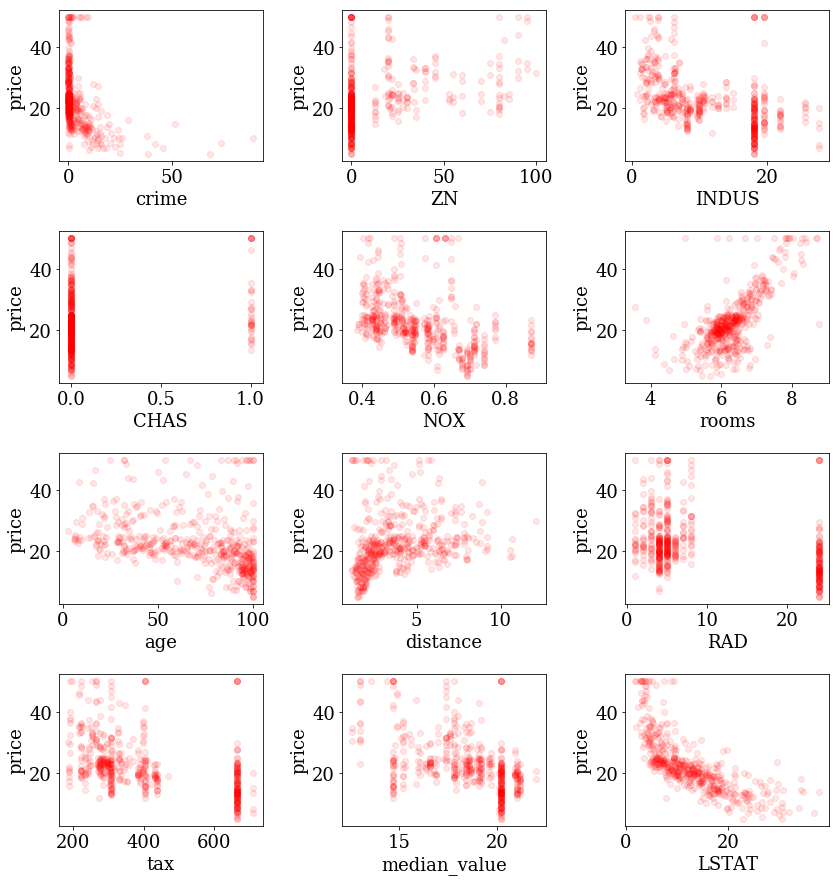

In [14]:
n_col = 3
n_row = 1 + np.ceil(len(features)/n_col)
plt.figure(figsize=(4*n_col,3*n_row))

for index, feature in enumerate(features):
    plt.subplot(n_row, n_col, index+1)
    plt.scatter(dataframe[feature], dataframe['price'], alpha=0.1, color='red')
    plt.xlabel(feature)
    plt.ylabel('price')
    
plt.tight_layout()

It's quite easy to see from above that the number of rooms and distance are important in the price.

In [15]:
baseline_features = ['rooms', 'distance']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(dataframe[baseline_features], dataframe.price, test_size=0.3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(n_jobs=-1)

In [20]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [21]:
y_pred = model.predict(x_test)

Text(0,0.5,u'predicted')

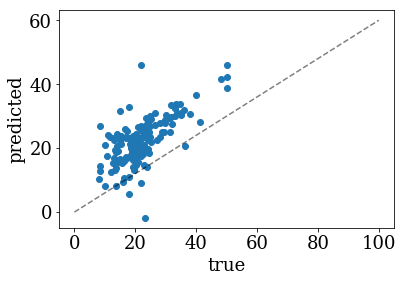

In [22]:
plt.scatter(y_test, y_pred)

x = np.linspace(0, 60, 101)
plt.plot(x, linestyle='--', alpha=0.5, color='black')

plt.xlabel('true')
plt.ylabel('predicted')

In [23]:
def r_square_metric(y_true, y_pred):
    return 1-np.sum((y_true-y_pred)**2)/np.sum(y_true**2)

def average_percent_error(y_true, y_pred):
    return np.average(np.abs((y_true-y_pred)/y_true))

In [24]:
print(r_square_metric(y_test, y_pred))
print(average_percent_error(y_test, y_pred))

0.932046596128
0.239137953478


## More Features 
We can also try to do the same thing with more features 

In [25]:
model_plus = LinearRegression(n_jobs=-1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(dataframe[features], dataframe.price, test_size=0.3)

In [27]:
model_plus.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [28]:
y_pred = model_plus.predict(x_test)

In [29]:
print(r_square_metric(y_test, y_pred))
print(average_percent_error(y_test, y_pred))

0.961581827243
0.176954148342


Text(0,0.5,u'predicted')

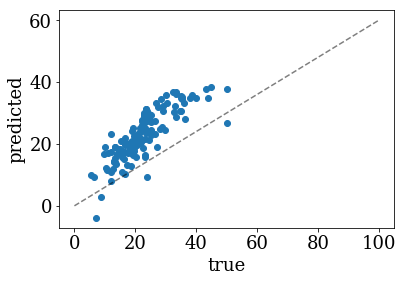

In [30]:
plt.scatter(y_test, y_pred)
plt.plot(x, linestyle='--', alpha=0.5, color='black')


plt.xlabel('true')
plt.ylabel('predicted')